<div class="header">
D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Indici di eterogeneità.
</div>
<hr style="width: 90%;" align="left" />





<div id="h-0"></div>

# Indici di eterogeneità
Nel caso di variabili qualitative nominali la varianza e gli altri indici da essa derivati non si possono calcolare (infatti non sono calcolabili la media né la mediana né altri valori numerici di riferimento dai quali calcolare le distanze). È comunque necessario avere un indice che misuri la dispersione della distribuzione delle frequenze, detta _eterogeneità_. In particolare diremo che una variabile si distribuisce in modo eterogeneo se ogni suo valore si presenta con la stessa frequenza.





<div id="h-1"></div>

## Indice di eterogeneità di Gini
Dato un campione $\{ a_1, \dots, a_n \}$ in cui occorrono i valori distinti $v_1, \dots, v_s$ e indicando con $f_i$ la frequenza relativa dell'elemento $v_i$ per $i = 1, \dots, s$, la quantità

\begin{equation}
        I = 1 - \sum_{i=1}^s f_i^2
\end{equation}

è detta _indice di eterogeneità di Gini_. Si noti che:

- $0 \leq I < 1$, in quanto:
  - per almeno un $j$ si ha $f_j^2 > 0$ e quindi $\sum f_i^2 > 0$, il che implica $I < 1$;
  - per ogni $i$ si ha $f_i^2 \leq f_i$ essendo $0 \leq f_i \leq 1$, e dunque $\sum f_i^2 \leq \sum f_i = 1$, il che implica $ I \geq 0$;
- in caso di eterogeneità minima (o massima omogeneità), tutti gli elementi del campione assumono lo stesso valore, dunque esiste un solo $j$ per cui $f_j = 1$ e per ogni $i \neq j$ si ha $f_i = 0$, pertanto $I = 1 - 1 = 0$;
- in caso di eterogeneità massima tutte le osservazioni hanno invece la medesima frequenza $f_i = \frac{1}{s}$, e quindi $I = 1 - \frac{1}{s} = \frac{s-1}{s}$.

Nel caso in cui si voglia operare con un indice che assuma valori tra $0$ e $1$, è possibile dividere l'indice di Gini per il valore massimo $\frac{s-1}{s}$, ottenendo il cosiddetto _indice di Gini normalizzato_:

\begin{equation}
        I' = \frac{s \cdot I}{s-1}
\end{equation}

Consideriamo il grafico seguente, che traccia l'andamento dell'indice di Gini nel caso di due valori distinti $v_1$ e $v_2$, di cui indicheremo rispettivamente con $f$ e $1-f$ le frequenze relative.

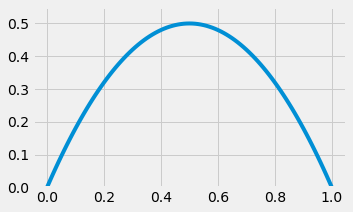

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import golden

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))

def gini_2_val(f):
    return 1 - f**2 - (1-f)**2

x = np.arange(0, 1.01, .01)
y = list(map(gini_2_val, x))

plt.plot(x, y)
plt.ylim((0, 0.55))
plt.show()

Il grafico evidenzia come non solo l'indice di Gini assuma valori minimo e massimo rispettivamente in corrispondenza delle situazioni di minima e massima eterogeneità nel campione, ma effettivamente si abbia una crescita graduale del valore dell'indice man mano che l'eterogeneità nel campione aumenta, seguita da una sua riduzione man mano che questa ritorna a diminuire. In altre parole, questo indice cattura effettivamente il concetto di eterogeneità traducendolo in una quantità numerica.

Per calcolare il valore dell'indice di Gini per i dati contenuti in una serie è necessario calcolare le corrispondenti frequenze relative tramite `value_counts`; per elevare queste ultime al quadrato risulta utile invocare sulla serie delle frequenze il metodo `map` e poi sommare i valori ottenuti e sottrarre da 1 il risultato.

In [2]:
def gini(series):
    return 1 - sum(series.value_counts(normalize=True).map(lambda f: f**2))

Possiamo quindi utilizzare la funzione `gini` per valutare l'eterogeneità dei valori assunti dagli attributi _Publisher_ (limitatamente a `'Marvel Comics'` e `'DC Comics'`) _Eye color_, _Hair color_ (senza considerare in entrambi i casi i valori mancanti) e per i nomi dei supereroi (ottenuti a partire dall'indice del _dataframe_). 

In [3]:
import pandas as pd

heroes = pd.read_csv('data/heroes.csv', sep=';', index_col=0)

publisher = heroes[heroes['Publisher'].isin(['Marvel Comics', 'DC Comics'])]['Publisher']
eye_color = heroes[pd.notnull(heroes['Eye color'])]['Eye color']
hair_color = heroes[pd.notnull(heroes['Hair color'])]['Hair color']

print(gini(publisher))
print(gini(eye_color))
print(gini(hair_color))
print(gini(heroes.index))

0.45945353273979217
0.77232789326401
0.8370723950922644
0.9985654125595816


I risultati ottenuti ci dicono che l'attributo più omogeneo tra quelli considerati è quello relativo all'editore: ciò è dvuto al fatto che sono stati considerati solamente i due editori con il maggior numero di valori. Il nome dei supereroi risulta invece l'attributo più eterogeneo, e anche in questo caso si tratta di un risultato che ci potevamo aspettare, in quanto è ragionevole supporre che i valori assunti dal nome siano univoci.





<div id="h-2"></div>

## Entropia

Dato un campione $\{ a_1, \dots, a_n \}$ in cui occorrono i valori distinti $v_1, \dots, v_s$ e indicando con $f_i$ la frequenza relativa dell'elemento $v_i$ per $i = 1, \dots, s$, la quantità

\begin{equation}
H = \sum_{i=1}^s f_i \log \frac{1}{f_i} = - \sum_{i=1}^s f_i \log f_i
\end{equation}

è detta _indice di entropia_ del campione.

La funzione $p \mapsto \log \frac{1}{p}$ è detta _autoinformazione_, e il suo andamento in $(0,1]$ è il seguente

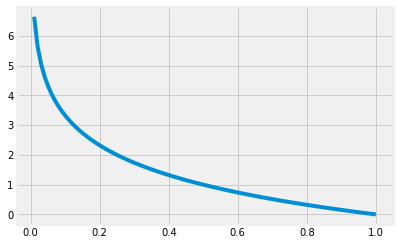

In [4]:
x = np.arange(0.01, 1.01, 0.01)
y = list(map(lambda f: -1 * np.log2(f), x))
plt.plot(x, y)
plt.show()

In particolare la funzione vale $0$ quando $p=1$ e tende a infinito per $p$ che tende a $0$. Il grafico dell'andamento di un generico addendo dell'entropia è il seguente.

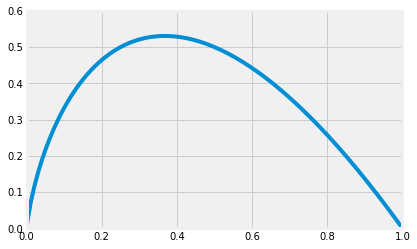

In [5]:
x = np.arange(0.001, 1.01, 0.01)
y = list(map(lambda f: -f * np.log2(f), x))
plt.plot(x, y)
plt.ylim(0, 0.6)
plt.xlim(0, 1)
plt.show()

Il risultato ottenuto evidenzia come si possa estendere la definizione del generico addendo anche per $f_i = 0$, ponendolo uguale a $1$. Valgono inoltre le osservazioni che seguono.

- Per ogni $i$ vale $- f_i \log f_i \geq 0$, dunque $H \geq 0$.
- Per ogni $i$ vale $- f_i \log f_i = 0$ se e solo se $f_i = 0$ oppure $f_i = 1$, pertanto $H = 0$ se e solo se ci si trova in condizione di massima omogeneità (e cioè tutti gli elementi del campione assumono lo stesso valore).
- In caso invece di massima eterogeneità si avrà $f_i=\frac{1}{s}$ e quindi $H = \log s$, e si può dimostrare che in tal caso l'entropia assume il valore massimo.

Si può pertanto definire l'_indice di entropia normalizzato_

\begin{equation}
H' = \frac{H}{\log s}
\end{equation}

i cui valori variano tra $0$ e $1$. Se il logaritmo è in base $2$ (come nel codice che abbiamo scritto) allora l'entropia si misura in _bit_; è però possibile usare altre basi: per esempio, il logaritmo naturale e quello in base 10 corrispondono rispettivamente a due unità chiamate _nat_ e _hartley_.

Analogamente a quanto visto per l'indice di Gini, è possibile visualizzare l'andamento dell'entropia nel caso di due valori possibili, mettendo in evidenza che anche questo indice tende ad aumentare all'aumentare dell'eterogeneità e a diminuire al diminuire di quest'ultima.


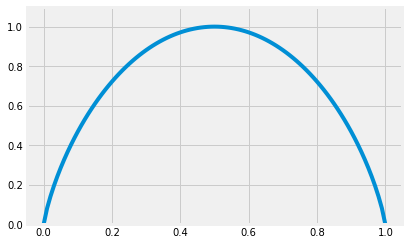

In [6]:
def entropy_2_val(f):
    return 0 if f in (0, 1) else - f * np.log2(f) - (1-f) * np.log2(1-f)

x = np.arange(0, 1.01, .01)
y = list(map(entropy_2_val, x))
plt.plot(x, y)
plt.ylim((0, 1.1))
plt.show()

Calcolando il valore dell'entropia pergli attributi precedentemente considerati si verifica come non cambi il loro rapporto relativo in termini di eterogeneità.

In [7]:
def entropy(series):
    return sum(series.value_counts(normalize=True).map(lambda f: -f * np.log2(f)))

print(entropy(publisher))
print(entropy(eye_color))
print(entropy(hair_color))
print(entropy(heroes.index))              

0.9406863895967433
2.7454093094041547
3.1308603347354245
9.470566732235026







<div id="h-3"></div>

## Alberi di decisione


Gli indici di eterogeneità sono alla base della costruzione di un interessante classificatore chiamato _albero di decisione_. Un albero di decisione assegna _oggetti_ a _classi_, dove un oggetto è descritto tramite un'osservazione che consiste, al solito, in un vettore di valori per degli attributi prefissati. Il procedimento di classificazione procede nel modo seguente: si considera la _radice_ dell'albero, cioè l'unico nodo a cui non arrivano frecce (disposto di solito in alto nella rappresentazione dell'albero), e che è contrassegnato da una condizione che coinvolge i valori di uno o più attributi per l'oggetto che si vuole classificare. A seconda del valore di questa condizione, si percorre una delle due frecce partenti dalla radice. Se il nodo a cui si arriva è un nodo terminale (una _foglia_ da cui non dipartono nuove frecce), in tale nodo è indicata la classe assegnata all'oggetto, altrimenti il nodo riporta un'altra condizione da valutare, iterando il comportamento precedente fino a che non si raggiunge una foglia e quindi si determina una classe per l'oggetto.

Consideriamo per esempio l'albero riportato qui sotto, che fa riferimento a un dataset molto semplice che in funzione delle condizioni meteorologiche permette di capire se si può uscire a giocare. La radice richiede di iniziare valutando che tempo fa (attributo _Outlook_): se è nuvoloso (_overcast_) si arriva a una foglia che dice che si può uscire (_Yes_); se invece dovesse essere soleggiato viene richiesto di valutare se l'umidità abbia o meno un valore inferiore a 30; nel primo caso si potrebbe uscire, altrimenti no. Il processo di classificazione funziona in modo analogo nel caso di tempo piovoso (_rain_).

![Esempio di albero di decisione](./img/decision-tree.png)

La costruzione di un albero di ricerca richiede innanzitutto di individuare un indice di eterogeneità. Facciamo un esempio selezioniamo l'indice di Gini e lavorando solo con due classi: i superori e i supercattivi, che indicheremo rispettivamente con le etichette `good_guy` e `bad_guy`. Il fatto di avere solo due etichette possibili semplifica notevolmente il calcolo dell'indice: basterà infatti specificare la frequenza relativa $f$ di `good_guy`, così che la frequenza relativa di `bad_guy` sarà $1-f$ e l'indice di Gini assumerà il valore $1 - f^2 - (1-f)^2$: potremo quindi riutilizzare la funzione `gini_2_val` precedentemente definita.

Per mantenere l'albero di decisione di dimensioni compatte selezioniamo un numero relativamente basso di supererori e supercattivi (la scelta è stata fatta anche in modo da non avere a che fare con valori mancanti, che avrebbero complicato il processo di calcolo dell'albero).

In [8]:
good_guys = heroes.loc[['Wonder Woman', 'Aquaman', 'Cyborg', 'Flash II']]
bad_guys = heroes.loc[['Black Manta', 'Penguin', 'Joker', 'Deathstroke', 'Bizarro']]
all_guys = pd.concat([good_guys, bad_guys])

Estraiamo dal _dataframe_ ottenuto gli attributi corrispondenti ad altezza, peso, genere, anno di prima apparizione, colore di occhi e capelli, forza e intelligenza, in quanto i rimanenti attributi sono o identici per tutti i casi selezionati o rappresentano valori univoci.

In [9]:
features = ['Height', 'Weight', 'Gender', 'First appearance',
            'Hair color', 'Eye color', 'Strength', 'Intelligence']
X = all_guys[features]

Il risultato, memorizzato in `X`, è visualizzato qui sotto.

In [10]:
X

,Height,Weight,Gender,First appearance,Hair color,Eye color,Strength,Intelligence
Name,,,,,,,,
Wonder Woman,183.13,74.74,F,1941.0,Black,Blue,100.0,high
Aquaman,185.71,146.96,M,1941.0,Blond,Blue,85.0,high
Cyborg,198.12,173.81,M,1980.0,Black,Brown,55.0,good
Flash II,183.41,88.32,M,1956.0,Blond,Blue,50.0,high
Black Manta,188.12,92.78,M,1967.0,No Hair,Black,30.0,good
Penguin,157.89,79.13,M,1941.0,Black,Blue,10.0,good
Joker,196.07,86.91,M,1940.0,Green,Green,10.0,high
Deathstroke,193.87,101.98,M,1980.0,White,Blue,30.0,good
Bizarro,191.00,155.57,M,1958.0,Black,Black,95.0,moderate


In corrispondenza di ogni osservazione in `X` è poi necessario indicare la relativa etichetta. Per comodità è meglio organizzare queste etichette in un _dataframe_ separato che si può costruire facilmente: siccome i primi quattro elementi di `X` rappresentano supereroi mentre i rimanenti elementi rappresentano supercattivi, è sufficiente fondere insieme due _dataframe_ dei quali il primo contiene tante copie dell'etichetta `good_guy` quanti sono i supereroi e il secondo è costruito in modo analogo ma considerando i supercattivi.

In [11]:
Y = pd.concat([pd.DataFrame(['good guy'] * len(good_guys), index=good_guys.index),
               pd.DataFrame(['bad guy'] * len(bad_guys), index=bad_guys.index)])

Ora che abbiamo organizzato i dati a disposizione, è necessario decidere la condizione da inserire nella radice dell'albero. La scelta viene fatta considerando una serie di possibili condizioni, valutando per ognuna il modo in cui i dati risulterebbero suddivisi nei due nodi sottostanti la radice. Consideriamo, per esempio, una condizione che valuti se l'attributo _Strength_ assume un valore minore o uguale a 40 e visualizziamo le etichette delle osservazioni che soddisfano tale condizione.

In [12]:
Y[X['Strength'] <= 40]

,0
Name,
Black Manta,bad guy
Penguin,bad guy
Joker,bad guy
Deathstroke,bad guy


Il risultato è molto interessante in quanto le etichette sono tutte uguali, e quindi l'eventuale nodo successivo nell'albero sarebbe una foglia che etichetta i casi come `bad_guy`. Le cose cambiano, sebbene poco, se consideriamo le osservazioni che non soddisfano la condizione.

In [13]:
Y[X['Strength'] > 40]

,0
Name,
Wonder Woman,good guy
Aquaman,good guy
Cyborg,good guy
Flash II,good guy
Bizarro,bad guy


In questo caso infatti vi è un solo caso di `bad_guy` e tutte le osservazioni rimanenti sono relative a `good_guy`. In altre parole, la condizione considerata è buona in quanto suddivide le osservazioni in due gruppi che tendono a essere omogenei rispetto all'etichetta assunta. Si può quindi utilizzare l'indice di Gini per quantificare quanto sia buona l'omogeneità: più l'indice sarà basso, più le osservazioni saranno omogenee. È dunque necessario calcolare la frequenza relativa delle due etichette nei due gruppi. Il calcolo di queste frequenze si può fare invocando `value_counts` sull'unica serie dei _dataframe_ coinvolti. Una volta ottenuta la frequenza relativa di una delle due etichette è poi possibile calcolare il valore dell'indice di Gini. Per esempio, concentrandosi sul gruppo di casi per cui la forza è minore o uguale a 40 e ragionando in termini della frequenza di `'bad guy'` si otterrebbe il risultato seguente.

In [14]:
freq = Y[X['Strength'] <= 40][0].value_counts(normalize=True)
freq_bad = freq['bad guy']
gini_left = gini_2_val(freq_bad)
gini_left

0.0

Il valore dell'indice per il rimanente gruppo di casi si ottiene in modo analogo.

In [15]:
freq = Y[X['Strength'] > 40][0].value_counts(normalize=True)
freq_bad = freq['bad guy']
gini_right = gini_2_val(freq_bad)
gini_right

0.31999999999999984

Per combinare insieme i due indici al fine di esprimere in un unico valore l'omogeneità media dei casi suddivisi nei sottogruppi si calcola una loro media, pesata in funzione della numerosità dei sottogruppi stessi.

In [16]:
weight_left = float(len(Y[X['Strength'] <= 40])) / len(Y)
weight_right = float(len(Y[X['Strength'] > 40])) / len(Y)
gini_left * weight_left + gini_right * weight_right

0.1777777777777777

Tirando le somme, utilizzando la domanda: "la forza è minore o uguale a 40?" come criterio per la radice dell'albero si otterrebbe una suddivisione dei dati a disposizione in due gruppi con un'eterogeneità media pari a circa 0.17. Possiamo ora mantenere fisso l'attributo e considerare valori diversi per la soglia, al fine di trovare il valore che minimizza l'indice di Gini medio (e quindi corrisponde al caso di migliore omogeneità). Attrezziamoci per effettuare questo calcolo indipendentemente dalla scelta dell'attributo, del valore di soglia e dell'indice di eterogeneità.

In [17]:
def split_value(attribute, value, index):
    freq = (Y[X['{}'.format(attribute)] <= value])[0].value_counts(normalize=True)
    freq_bad = freq['bad guy']
    index_left = index(freq_bad)
    weight_left = float(len(Y[X['{}'.format(attribute)] <= value])) / len(Y)
    freq = (Y[X['{}'.format(attribute)] > value])[0].value_counts(normalize=True)
    freq_bad = freq['bad guy']
    index_right = index(freq_bad)
    weight_right = float(len(Y[X['{}'.format(attribute)] > value])) / len(Y)
    return index_left * weight_left + index_right * weight_right

Ovviamente utilizzando la funzione `split_value` otteniamo lo stesso risultato se riconsideriamo una suddivisione in gruppi basata sulla soglia 40 per la forza.

In [18]:
split_value('Strength', 40, gini_2_val)

0.1777777777777777

Ora siamo però in grado di effettuare in modo automatico lo stesso calcolo al variare dei possibili valori per la soglia.

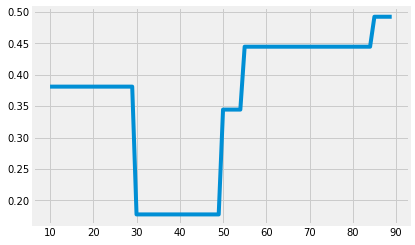

In [19]:
plt.plot(range(10,90), list(map(lambda v: split_value('Strength', v, gini_2_val), range(10,90))))
plt.show()

I risultati ottenuti ci dicono che un qualsiasi valore tra 30 e 49 massimizza l'omogeneità dei due sottogruppi generati. Avremmo ottenuto un risultato simile se come indice di eterogeneità avessimo utilizzato l'entropia.

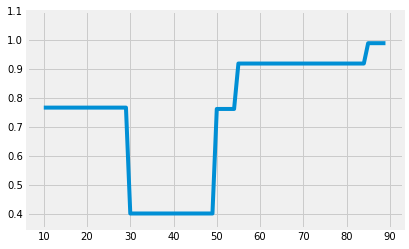

In [20]:
plt.plot(range(10,90), list(map(lambda v: split_value('Strength', v, entropy_2_val), range(10,90))))
plt.ylim(0.35, 1.1)
plt.show()

Per proseguire con la creazione dell'albero di decisione bisognerebbe applicare nuovamente il processo di ottimizzazione al gruppo che non ha omogeneità massima. In realtà esistono già delle implementazioni che si occupano di costruire gli alberi di decisione: noi faremo riferimento alla libreria `sklearn`. Nonostante il calcolo degli indici di eterogeneità si può effettuare anche su attributi a valori categorici, questa libreria richiede che i dati siano espressi utilizzando esclusivamente valori numerici. È dunque necessario convertire in numeri tutte le etichette categoriche. Questo procedimento può essere fatto automaticamente utilizzando gli oggetti della classe `LabelEncoder`, che una volta creati generano automaticamente il mapping tra etichette e valori numerici utilizzando il metodo `fit` a cui viene passato l'insieme delle osservazioni da convertire.

In [21]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
gender_encoder.fit(all_guys['Gender'])

eye_col_encoder = LabelEncoder()
eye_col_encoder.fit(all_guys['Eye color'])

hair_col_encoder = LabelEncoder()
hair_col_encoder.fit(all_guys['Hair color'])

intelligence_encoder = LabelEncoder()
_ = intelligence_encoder.fit(all_guys['Intelligence'])

Una volta determinato questo mapping, il metodo `transform` lo utilizza per convertire la serie corrispondente.

In [22]:
all_guys['Gender'] = gender_encoder.transform(all_guys['Gender'])
all_guys['Eye color'] = eye_col_encoder.transform(all_guys['Eye color'])
all_guys['Hair color'] = hair_col_encoder.transform(all_guys['Hair color'])
all_guys['Intelligence'] = intelligence_encoder.transform(all_guys['Intelligence'])

<div class="alert alert-info">
La cella precedente mostra come sia possibile _modificare_ i contenuti di una colonna in un _dataframe_. Utilizzando una sintassi analoga è anche possibile _aggiungere_ a un _dataframe_ esistente una o più colonne.
</div>

Possiamo ora visualizzare il nuovo _dataframe_, ora composto solo da valori numerici, limitatamente agli attributi cui siamo interessati.

In [23]:
X = all_guys[features]
X

,Height,Weight,Gender,First appearance,Hair color,Eye color,Strength,Intelligence
Name,,,,,,,,
Wonder Woman,183.13,74.74,0,1941.0,0,1,100.0,1
Aquaman,185.71,146.96,1,1941.0,1,1,85.0,1
Cyborg,198.12,173.81,1,1980.0,0,2,55.0,0
Flash II,183.41,88.32,1,1956.0,1,1,50.0,1
Black Manta,188.12,92.78,1,1967.0,3,0,30.0,0
Penguin,157.89,79.13,1,1941.0,0,1,10.0,0
Joker,196.07,86.91,1,1940.0,2,3,10.0,1
Deathstroke,193.87,101.98,1,1980.0,4,1,30.0,0
Bizarro,191.00,155.57,1,1958.0,0,0,95.0,2


Usando questo _dataframe_ modificato è possibile utilizzare un oggetto della classe `DecisionTreeClassifier` per costruire l'albero di decisione, passando al metodo `fit` i _dataframe_ che descrivono rispettivamente i supereroi e le loro etichette.

In [24]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Una volta costruito, sull'oggetto corrispondente all'albero è possibile invocare il metodo `predict` per verificare quale etichetta venga associata agli oggetti di partenza.

In [25]:
clf.predict([X.loc[name] for name in X.index])

array(['good guy', 'good guy', 'good guy', 'good guy', 'bad guy',
       'bad guy', 'bad guy', 'bad guy', 'bad guy'], dtype=object)

È inoltre possibile visualizzare l'albero di decisione in forma grafica, utilizzando la libreria `graphviz`.

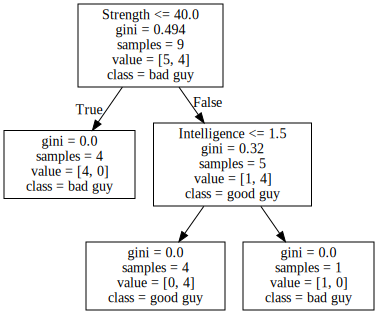

In [26]:
import graphviz

graphviz.Source(tree.export_graphviz(clf, out_file=None, 
                                    class_names=['bad guy', 'good guy'],
                                    feature_names=features))

Infine, è in teoria possibile utilizzare l'albero ottenuto per ottenere una classificazione per supereroi non utilizzati per costruire l'albero stesso. Per far questo è però necessario tradurre i valori categorici in numeri, riutilizzando i `LabelEncoder` precedentemente preparati. Per comodità, costruiamo una funzione che si occupi di effettuare questa trasformazione.

In [27]:
def filter(obj):
    transformed_obj = obj['Height':'Intelligence']
    transformed_obj['Gender'] = gender_encoder.transform([transformed_obj['Gender']])[0]
    transformed_obj['Eye color'] = eye_col_encoder.transform([transformed_obj['Eye color']])[0]
    transformed_obj['Hair color'] = hair_col_encoder.transform([transformed_obj['Hair color']])[0]
    transformed_obj['Intelligence'] = intelligence_encoder.transform([transformed_obj['Intelligence']])[0]
    return transformed_obj

Possiamo quindi trasformare, per esempio, un supereroe e verificare a quale etichetta esso viene associato.

In [28]:
clf.predict([filter(heroes.loc['Professor X'])])

array(['bad guy'], dtype=object)

Il risultato ottenuto deve metterci in guardia: non necessariamente infatti un buon compoartamento degli alberi di decisione sui dati utilizzati per costruirli è associato a un analogo comportamento nell'_indurre_ etichette per dati nuovi. Le tecniche da utilizzare per valutare la cosiddetta capacità di _generalizzazione_ a nuovi casi esulano però dallo scopo del nostro corso.

In linea di principio gli alberi di decisione si possono costruire utilizzando un qualsiasi indice che valuti l'eterogeneità: la libreria sklearn supporta la scelta di questo criterio attraverso l'argomento opzionale `criterion` passato al costruttore di `DecisionTreeClassifier`. Il valore predefinito è `'gini'`, corrispondente ovviamente all'indice di Gini, ma è anche possibile specificare `'entropy'` nel caso in cui si volesse utilizzare l'entropia. Ovviamente l'albero ottenuto usando l'entropia non è necessariamente uguale a quello che si ottiene con l'indice di Gini. Per il nostro esempio, l'unica differenza risiede nel nodo di scelta al di sotto della radice, che sarebbe basato sull'attributo "Intelligence" invece che su "Eye color".

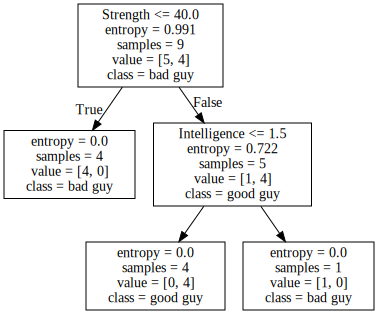

In [29]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, Y)
graphviz.Source(tree.export_graphviz(clf, out_file=None, 
                                    class_names=['bad guy', 'good guy'],
                                    feature_names=features))



<div id="h-4"></div>

## Indici di concentrazione

In presenza di variabili che rappresentano beni condivisibili in una popolazione, come per esempio la ricchezza, ci si può chiedere quanto la variabile sia equamente distribuita tra gli individui della popolazione, oppure quanto sia concentrata solo su un numero ridotto di osservazioni. Questo concetto è diverso dalla varianza, che misura la dispersione dei valori intorno a un valore medio.

Date $n$ osservazioni, indichiamo con $a_1, \dots, a_n$ il loro elenco una volta che queste sono state ordinate. Successivamente calcoliamone il valore medio

\begin{equation}
\bar a = \frac{1}{n} \sum_{i=1}^n a_i
\end{equation}

e sommiamole, ottenendo $\mathrm{TOT} = n \bar a = \sum_{i=1}^n a_i$. Possiamo avere due situazioni estreme:

1. in caso di concentrazione minima tutti gli elementi del campione assumono lo stesso valore: $a_1 = a_2 = \dots = a_n = \bar a$;
2. in caso di concentrazione massima tutti gli elementi del campione assumono il valore $0$, a parte uno:  $a_1 = a_2 = \dots = a_{n-1} = 0$ e $a_n = n \bar a$.

In generale allora ci può interessare valutare un indice di concentrazione, che valga $0$ oppure $1$ nei casi rispettivamente di concentrazione minima e massima, e che sia negli altri casi sia un valore crescente in funzione della concentrazione. Consideriamo:

- la frequenza relativa cumulata fino all'$i$-esima osservazione: $F_i = \frac{i}{n}$, per $i = 1, \dots, n$, e
- la quantità relativa cumulata fino all'$i$-esima osservazione: $Q_i = \frac{\sum_{k=1}^i a_k}{\mathrm{TOT}}$.

Si verifica facilmente che

- $0 \leq F_i \leq 1$ e $0 \leq Q_i \leq 1$;
- $Q_i \leq F_i$ dal momento che le osservazioni sono state ordinate in modo crescente;
- $Q_i = F_i$ nel caso di concentrazione minima;
- $Q_n = F_n$.

Per $i = 1, \dots,n$ le coppie $(F_i, Q_i)$ indicano che il $100 F_i \%$ della popolazione detiene il $100 Q_i \%$ della quantità considerata. Se si considerano i punti sul piano che sono identificati da queste coppie:

- nel caso di concentrazione minima tutti i punti $(F_i, Q_i)$ giacciono sulla retta $F = Q$: possiamo dunque dire che in questo caso $F_i - Q_i = 0$ per ogni $i$;
- nel caso di concentrazione massima i punti $(F_i, Q_i)$ per $i = 1, \dots, n-1$ giacciono sulla retta $Q = 0$, tranne l'ultimo per cui $F_n = Q_n = 1$: dunque in questo caso $F_i - Q_i = F_i$ per $i = 1, \dots, n-1$ e $F_n - Q_n = 0$.

Nei casi intermedi si avrà dunque che i punti staranno su una curva "sotto" la retta $F = Q$, dato che $Q_i \leq F_i$, e più tale curva si "allontana" dalla retta, più la concentrazione è alta.

L'area compresa tra la curva dei punti $(F_i, Q_i)$ e la retta di equidistribuzione (la retta a $45^{\circ}$) è detta _area di concentrazione_ e può essere utilizzata come base per la definizione di appositi rapporti di concentrazione, di cui l'indice di Gini costituisce un esempio. Maggiore infatti è la concentrazione osservata, maggiore sarà tale area.

Si definisce _indice di concentrazione (o coefficiente) di Gini_ il rapporto

\begin{equation}
	G = \frac{\sum_{i=1}^{n-1}F_i - Q_i}{\sum_{i=1}^{n-1}F_i}
\end{equation}

tra la quantità $\sum_{i=1}^{n-1}F_i - Q_i$ e il suo valore massimo

\begin{equation}
\sum_{i=1}^{n-1}F_i = \frac{1}{n} \sum_{i=1}^{n-1} i = \frac{1}{n} \frac{(n-1)n}{2} = \frac{(n-1)}{2}
\end{equation}

Per quanto appena visto,

- $0 \leq G \leq 1$, e
- $G = \frac{2}{n-1} \sum_{i=1}^{n-1} F_i - Q_i$

Calcoliamo l'indice di concentrazione di Gini per l'attributo _Strength_, nell'idea di verificare se la forza sia più o meno equamente distribuita tra i supereroi.

In [30]:
strength = heroes[pd.notnull(heroes['Strength'])]['Strength']

Le quantità relative cumulate si ottengono ordinando i valori, calcolando le corrispondenti somme cumulate e dividendole per la "quantità" totale di forza.

In [31]:
Q = strength.sort_values().cumsum() / sum(strength)

Le frequenze relative cumulate sono facili da calcolare: il loro vettore ha come componenti i valori che vanno da $\frac{1}{n}$ a $1$, incrementandoli ogni volta di $\frac{1}{n}$, dove $n$ indica il numero di valori osservati.

In [32]:
import numpy as np
n = len(strength)
F = np.arange(1, n+1) / float(n)

Sottraendo componente per componente il vettore delle quantità cumulate a quello delle frequenze cumulate, sommando i risultati e moltiplicando per $\frac{2}{n-1}$ si ottiene il valore dell'indice di concentrazione.

In [33]:
2 * sum(F - Q) / (n-1)

0.4118214635457669

Nel nostro caso $G$ assume un valore intermedio tra i due possibili estremi, a indicare una distribuzione della forza relativamente concentrata su un sottoinsieme dei supereroi.

<hr style="width: 90%;" align="left" />
<span style="font-size: 0.8rem;">D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Indici di eterogeneità, 2017.</span>
<br>
<span style="font-size: 0.8rem;">Powered by <img src="img/jupyter-logo.png" style="height: 1rem; display: inline; margin-left: 0.5ex; margin-top: 0;" alt="Jupyter Notebook"></span>
<div style="float: left; margin-top: 1ex;">
<img src="http://mirrors.creativecommons.org/presskit/icons/cc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/by.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nd.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<span style="font-size: 0.7rem; line-height: 0.7rem; vertical-align: middle;">Quest'opera è distribuita con Licenza <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribuzione - Non commerciale - Non opere derivate 4.0 Internazionale</a></span>.
</div>